# 第二週上課內容

###Textbook

**C Primer Plus** by Stephen Prata

可以清大圖書館找到電子版
[NTHU Library Ebook](https://nthu.primo.exlibrisgroup.com/discovery/fulldisplay?docid=alma990010257450206774&context=L&vid=886UST_NTHU:886UST_NTHU&lang=zh-tw&search_scope=MyInst_and_CI&adaptor=Local%20Search%20Engine&isFrbr=true&tab=Everything&query=any%2Ccontains%2Cc%20primer%20plus&sortby=date_d&facet=frbrgroupid%2Cinclude%2C9022689444705798702&offset=0)


**中文版** (已絕版）
https://www.books.com.tw/products/0010688757

依照以前的經驗，即使沒有看教科書，大致上也不會影響學習。只要照著課程進度，熟悉上課教的內容並且充分練習作業，考試應該就不會有太大的問題。

上課參考教材：
https://github.com/htchen/i2p-nthu/tree/master/程式設計一


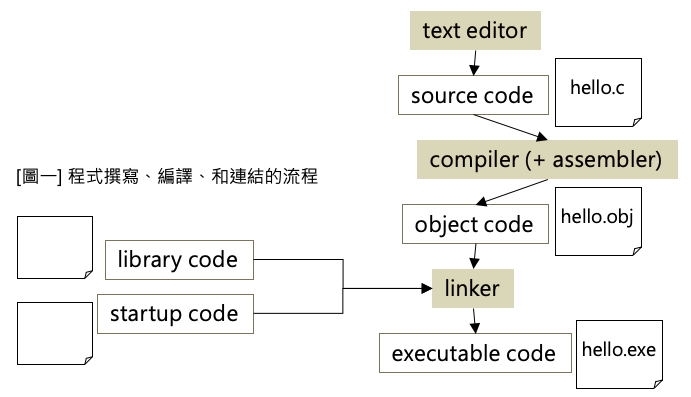

### [圖一] 程式撰寫、編譯、和連結的流程

**text editor** 是用來寫程式的純文字編輯器，通常還會有一些額外的輔助功能，譬如縮排或改變關鍵字顏色，讓你的程式碼看起來更一目了然。

**compiler** 是程式語言的核心工具，用來將你寫的 C source code 變成一堆要讓電腦執行的指令。由於我們要使用的程式開發工具 Visual C++、Dev C++ 或 Code::Blocks 所包含的 compiler 其實可以編譯 C 或 C++ source code，不過這兩種語言還是有一定程度的差異，所以必須強迫 VC++ 或 Dev C++ compiler 使用 C 語言的語法來編譯你的 source code。只要你的 source code 檔案存檔時選擇用的副檔名是 ".c"， VC++ 或 Dev C++ 就會用 C compiler 來編譯你的程式。VC++ 使用的是 Microsoft 自行開發的 compiler，而 Dev C++ 和 Code:Blocks 則通常是用公開原始碼的 MinGW GCC。 另外，在 Dev C++ 裡可以從主選單裡選 [Tools]-->[Compiler Options]-->[Settings] 然後在 C compiler 的項目裡把 "Support all ANSI standard C programs" 項目選成 "Yes"。

**linker** 是用來將編譯好的 object code 連結成最後的執行檔。因為除了我們自己寫的程式碼之外，無可避免一定會用到許多現成的 library (函式庫)。在現實的情況下，不可能每一東西都要靠自己創造，所以絕大多數的時候我們都會使用內建的或別人寫好的函式庫，來達到自己想要的功能。 linker 就是用來把我們的程式碼和需要的函式庫裡的程式碼連結在一起，形成單一的可執行檔。

In [62]:
!ls -la

total 44
drwxr-xr-x 1 root root 4096 Feb 22 11:41 .
drwxr-xr-x 1 root root 4096 Feb 22 10:28 ..
-rwxr-xr-x 1 root root 8304 Feb 22 11:04 a.out
drwxr-xr-x 4 root root 4096 Feb  1 14:31 .config
-rwxr-xr-x 1 root root 8304 Feb 22 11:41 hello_world
-rw-r--r-- 1 root root  184 Feb 22 11:43 hello_world.c
drwxr-xr-x 1 root root 4096 Feb  1 14:32 sample_data


In [57]:
%%writefile hello_world.c
//The C code starts from here.
#include <stdio.h>
int main(void) 
{ 
  printf("==================\n"); 
  printf("   Hello world!\n"); 
  printf("==================\n"); 
  return 0;
}

Overwriting hello_world.c


In [56]:
%%shell

gcc hello_world.c -o hello_world
./hello_world

   Hello world!


### Example 1
*   為什麼要 `#include` 
*   `main` 是什麼？
*   `printf` 只打 print 可以嗎？
*   為什麼要雙引號 `" "`？
*   `\n` 反斜線加上 n 是什麼意思？
*   為什麼最後要有分號 `;` ？
*   `main` 前面的 `int` 是什麼意思？
*   `main` 後面括號裡的 `void` 是什麼意思？
*   為什麼要 `return 0;`

In [137]:
%%writefile E02_01.c

#include <stdio.h>

int main(void) /* display integer on screen */  {
  int num; // 變數 num 的型別是有整數 0, -1, 1, -2, 2, -3, ...
  num = 123; 
  printf("The number is %d.\n", num);
  return 0; 
}


Overwriting E02_01.c


In [136]:
%%shell

gcc E02_01.c -o E02_01
./E02_01

The number is \123\.


這個簡單的程式會在螢幕上顯示一串文字 `The number is 123.` 。這個程式包含了每個程式幾乎都會有的幾個主要結構。我們一行一行來解釋它們的作用。程式開頭第一行

`#include <stdio.h>`

使用 `#include` 來將 `stdio.h` 檔案的內容加到你的程式的最前面。因為 `stdio.h` 檔案裡包含了許多和輸入輸出 (I/O) 有關的東西，當我們需要用到標準的輸入輸出功能時，只要用 `#include` 的方式把 `stdio.h` 引入，就不用重打 `stdio.h` 的內容。`stdio.h` 這個檔案包含在你安裝的 C compiler 中，可以試著搜尋 Dev C++ 或 VC++路徑裡的 `stdio.h` 檔案，然後用 Dev C++ 或其他純文字編輯器 (例如 notepad 或 TextEdit) 打開來看看裡面有多少內容。接下來看下一行

`int main(void)`

基本上 C 程式可以看成是許多 functions 的集合，每個 function 會負責某項工作，依照輸入的參數對資料作處理，然後將結果傳回。其中最重要的而且一定要包含的 function 就是 `main()`，它是你的程式的進入點，當你的程式開始執行時，首先就會執行 `main()`，然後在 `main()` 裡面再去呼叫其他 functions。我們在接下來的課程會在詳細介紹 C functions，目前只要先記得你的程式裡一定要有一個名稱是 `main()` 的 function。在 `main()` 前面的 `int` 表示 `main()` 結束後回傳值 (return value) 的型別是 `int`，也就是整數 (integer)。這個回傳值會傳回給 function 的呼叫者。因為我們是在作業系統下執行你的程式，所以在這個例子裡 `main()` 會把值回傳給作業系統。另外，在括號中的 `void` 表示這個程式的 `main()` 在呼叫時不需要傳入任何參數，我們稍後也會再介紹如何讓 `main()` 從作業系統中取得參數。

這個範例還包含了註解　`/* display an integer on screen */`　所有被包含在 `/*` 和 `*/` 之間的文字，都會被 C compiler 忽略。註解的主要作用讓我們能在程式碼片段中夾雜文字說明，幫助撰寫或修改程式的人看懂程式碼。當程式碼越寫越多，程式變得很複雜的時候，註解可以讓我們更快速了解每段程式碼的意義。

接下來會看到波浪括號 `{ ... }`，中間夾著 `main()` 的內容。波浪括號的作用相當於標示出 `main()` 的勢力範圍。當你的程式還有其他 functions 時，也是用 `{ }` 來決定每個 function 涵蓋的範圍。 

再來看到的是 `int num;` 這行程式，這是所謂的變數宣告，我們要先讓 compiler 知道在 `{ }` 範圍內，將會用到一個整數 (integer) 變數 `num`。 前面提過 `int` 代表 integer， `num` 則是我們自己取的變數名稱。`int` 屬於的 C keywords 之一，而每個 keyword 都有特殊的意義，所以在替變數取名時要注意不要和這些 keywords 重複。(如果想先知道還有哪些 keywords，可以在網路上搜尋 "C keywords" 就會找到全部的 keywords 列表。) 在 C 裡面每個被用到的變數都必須先宣告過，如果忘了先宣告變數就直接使用，在 compile 的時候就會出錯。除了不能和已有的 keywords 重複之外，變數的取名還有一些限制。變數的名稱只能包含連續的大小寫英文字母、 `_` (底線)、以及數字等三類字元，而且只能用英文字母或底線當作第一個字元，變數開頭不能用數字，例如，例如： `num_dogs`, `B612`, `iPod`，都是合法的變數名稱 。變數名稱的長度最長不能超過 63 個字元，但是其實只有前 31 個字元是有效的，超過的部份會被忽略。C 語言會區分字母的大小寫，所以 `u2` 和 `U2` 代表兩個不同變數。寫程式時最好能使用固定命名規則。可以上網搜尋 "Naming Conventions (programming)"，參考慣用的規則來替變數和 function 取名。最後要特別注意的是，整個敘述句後面要用分號 `;` 來結尾，不能省略。剛開始寫程式時很容易因為忘記加分號而在 compile 時得到錯誤訊息。

`num = 123;` 這個敘述是所謂的 assignment statement，用來把變數 `num` 的值設定成 `123`。因為已經宣告過 `num` 是個整數變數，在記憶體會有個位置存放它的值。等號的意義就是把右邊的值放到左邊的變數裡。結尾同樣要有分號。

`printf("The number is %d.\n", num);` 這個敘述句呼叫了 `printf()` 這個 function。在剛開始學 C 的階段，`printf()` 會是我們最常用到的 function 之一，它的作用是把文字顯示在螢幕上。我們必須把想要顯示的字串當作參數傳給 `printf()`，在這個例子裡，我們傳了兩個參數給 `printf()`，兩個參數用逗號隔開。第一個參數是 
`"The number is %d.\n"`，第二個參數則是 `num`。然後 `printf()` 會把這兩個參數做適當的結合，把第一個參數裡的 `%d` 用 `num` 變數目前的值 (`123`) 取代，再把結果顯示在螢幕上。

第一個字串參數裡還有一個奇怪的東西 `\n`， 它代表換行字元，你可以試著把它去掉看看程式執行結果會有什麼不同。 另外可以試試看如果把那一行打成下面這種形式 (在程式碼中直接按 Enter 鍵換行) 會發生什麼結果:
```
       printf("The number is %d.
       ", num);
```
在 compile 的時候應該會出現錯誤訊息。由此可見，`\n` 是為了描述一些難以輸入的字元而設計的變通表示法 (稱作 escape sequence)，類似的字元還有 `\t` 表示 tab 空格， `\b` 表示 backspace，`\"` 表示雙引號，`\\` 表示反斜線。 我們再進一步解釋 `%d` 這個用法，它的作用是告訴 `printf()` 這個地方將會顯示一個整數，而且要用十進位 (decimal) 方式顯示。這樣的用法稱作格式化輸出，`printf()` 還有更多格式化輸出的選擇，我們會在稍後的例子裡一一介紹。
最後來到了 `return 0;` 這個敘述句。我們前面說過 `main()` 需要回傳一個整數給作業系統，這也是 `main()` 前面的 `int` 所代表的意義。既然已經指定要回傳整數，所以在程式結束時要用 `return` 這個 keyword 來指出我們要回傳的 值是多少。在這個例子回傳值是 `0`，至於它所代表的意義我們後續會再做介紹，目前暫時先忍耐一下，容許你的腦中 有一些不明確的東西存在。
到目前為止，我們已經學會了最基本的 C 程式結構:
```
#include <stdio.h>
int main(void)
{
  ...statements...
  return 0; 
}
```
在我們前幾週的課程中會不斷地用到類似的結構。剛開始學寫程式，都有一些固定的模式可以套用，只要照著把固定 的程式碼輸入就可以，真正需要變動 (設計) 的部份是 `...statements...` 那一段，這部份就要依照我們想達到的功能， 填入適當的程式碼。


###Example 2


* `printf` 括號裡 用逗點隔開 是什麼意思？
* 百分比 `%` 加 `d` 有什麼作用？
* `printf("1234+5678\n");` 和 `printf("%d\n", 1234+5678);` 差別是什麼？
* `1234+5678` 的運算什麼時候算？

In [138]:
%%writefile E02_02.c

#include <stdio.h>
int main(void)
{
  printf("%d\n", 1234+5678);
  return 0;
}

Writing E02_02.c


In [139]:
%%shell

gcc E02_02.c -o E02_02
./E02_02

6912


###Example 3
* `int x;` 的作用是什麼？
* `scanf` 的功能是什麼？
* `scanf` 為什麼不用 `\n`
* `scanf` 後面的 `x` 會什麼要加 `&`

In [159]:
%%writefile E02_03.c

#include <stdio.h>
int main(void)
{
  int x;
  scanf("%d", &x);
  printf("%d\n", x+1);
  return 0;
}


Overwriting E02_03.c


In [160]:
%%shell

gcc E02_03.c -o E02_03
./E02_03

123
124


要讓 C 程式讀取輸入的資料則可以用 `scanf()`，它的使用方法和 `printf()` 類似，都要先用第一個參 數指定格式，然後剩下的參數就是對應的變數。不一樣的地方是變數名稱前面多了`&` 符號。所以這一行程式碼
```
  scanf("%d", &x);
```
就會把使用者輸入的數值存入變數 `x` 中。讀取的格式為 `int`，因此用 `%d` 告訴 `scanf()` 要讀取的資料的格式是整數。至於為什麼 `scanf()` 傳參數的時候要多一個 `&` ? 底下用一個簡單的比喻來解釋: 如果把變數想成一個盒子，則變數名稱 (譬如 `x`) 就是寫在盒子上的標籤，用來和其他盒子區別，而盒子裡的東西就 是那個變數所儲存的數值。當我們要將變數當作參數傳給某個 function (譬如 `printf()`) 的時候，C 語言的作法就是 把盒子裡的東西拿出來交給那個 function。但是對於像是 `scanf()` 這樣功能的 function 來說，它要的並不是盒子裡的東西，而是要整個盒子，因為它要讓使用者輸入的數值，能夠被放進盒子裡。要達到把整個盒子當參數 (而不是把盒子裡的東西當參數) 的這個目的，作法就是在參數變數前加上 `&`，告訴 compiler 要把整個盒子傳給 `scanf()`，讓 `scanf()` 可以將使用者輸入的數值放進盒子裡，然後回到 `main()` 之後， `x` 這個變數裡面就可以取出當時使用者所輸入的數值。初學者最常犯 的錯誤就是在使用 `scanf()` 讀取整數或浮點數變數的時候，忘了在變數前面加上 `&`。

###Example 4

In [170]:
%%writefile E02_04.c

#include <stdio.h>
int main(void)
{
  int x, y;
  scanf("%d", &x);
  scanf("%d", &y);
  printf("%d\n", x+y);
  return 0;
}

Overwriting E02_04.c


In [171]:
%%shell

gcc E02_04.c -o E02_04
echo "5 6" | ./E02_04 > out
echo "11" > ans
diff ans out
ret=$?

if [[ $ret -eq 0 ]]; then
    echo "All accepted."
else
    echo "Wrong answer."
fi

All accepted.


###Exercise 1
修改 Example 4 ，將裡面的兩個 `scanf` 合併。

###補充說明
簡單的數學運算
例如：
```
   x = x * 2;
   x = (y+3)*5;
```
* 其中 `*` 代表乘法。 `/` 代表除法。
* 運算順序是先乘除後加減，否則要靠括號改變運算順序。
* 等號的作用是將**右邊的值**設給**左邊的變數**，所以左邊必須是變數，不能是數值 （例如 `3=x;` 不行)。

###Example 5


In [179]:
%%writefile E02_05.c

#include <stdio.h>
int func1(void);
int func2(void);
int main(void)
{
  func1();
  printf("L%03d\n", __LINE__);
  return 0;
}

int func1(void)
{
  func2();
  printf("L%03d\n", __LINE__);
  return 0;
}

int func2(void)
{
  printf("Hello world!\n");
  printf("L%03d\n", __LINE__);
  return 0;
}


Overwriting E02_05.c


In [180]:
%%shell

gcc E02_05.c -o E02_05
./E02_05

Hello world!
L022
L015
L008


問：為什麼在 `main` 的上面需要多加上兩行 
`int func1(void);`  和
`int func2(void);` ？

答：
為了要能區別「程式編譯的順序 」（這是 compiler 的工作，牠必須從檔案最前面開始，逐行解析，檢查你的程式碼的語法，並且轉換成對應的低階指令）
與「程式執行的順序」 （執行期間程式碼其實已經變成二進位碼，從 main 開始，依照函數呼叫順序，依照對應的運算順序進行）。


#Example 6
C Functions
* function name
* parameters (cf. arguments)
* return values
* stack


In [188]:
%%writefile E02_06.c

#include <stdio.h>
double square(double x)
{
  return x*x;
}

int main(void)
{
  double x;
  x = 3.2;
  printf("%f square is %f\n", x, square(x));
  return 0;
}

Overwriting E02_06.c


In [187]:
%%shell
gcc E02_06.c -o E02_06
./E02_06

3.256 square is 10.598


 `double` 型別，為了計算的精確度，可以把變數宣告成 `double` (雙倍精確度浮點數)。在這個 例子中，由於我們要計算的數值包含小數點後的位數，所以不適合再用 `int` 整數型別來儲存數值，而要用能夠表示 更精細的數值的浮點數型別變數。整數和浮點數儲存數值的方式不一樣，我們會再做更詳細的介紹，目前暫時先記得， 處理整數的資料，就用 `int` 變數;處理有小數點的資料，可以用 `double`。
除了 `double`，也可以用 `float` 的變數型別來處理小數。`float` 和 `double` 的差別是，`float` 的精確度比較低。

C 語言裡面當你的數值有小數點的時候，就不適合再用整數來儲存，而要用浮點數。當你寫 `3` 的時候，這個數會被 當成是整數，當你寫 `3.0` 就變會被認為是浮點數。除了直接寫出整個數值，浮點數還可以用以十為底的科學記號的 方式來表示，譬如: `2.5e-4` 就相當於 `2.5` 乘上 `10` 的 `-4` 次方，也就是 `0.00025`。浮點數和整數在電腦裡的儲 存格式不一樣，整數會完全用二進位編碼來儲存整個數值，浮點數則會拆成幾個部份，包括**正負號**、**底數**、**指數**三個 組成元素。用這樣的方式來儲存，讓我們可以用浮點數來表達更大範圍的數值(譬如 `-2` 後面接 `50` 個零，這麼大 的數只要寫成 `-2e50`，所以只要記錄 *i)* 是個負數，*ii)* 底數是 `2`，*iii)* 指數是 `50` 就夠了)。

然而浮點數的精確度仍舊是有限的，所以有時候浮點運算結果可能和你預期的結果之間會有點誤差，譬如你覺得算出來的答案應該是 `1.0`， 但是實際上儲存的浮點數可能是 `0.999999`。

此外，當我們把數值設定給變數時，要注意變數的型別是否符合我們的需求，譬如
```
  int a = 9.99;
  float pi = 3.1415926536;
```
這兩個情況都無法把我們想要的數值存到變數裡。對變數 `a` 來說，小數點後面的數目會被無條件捨去，所以 `a` 的值會 是 `9`。至於 `float` 的精確度只有保證**六個有效位數**，因此超過的位數就不一定正確。如果用 `double` 的話可以保證到 **十個有效位數**。

###Example 7
改成用 `scanf()` 讀取使用者輸入的數字，然後呼叫 `square` 將平方算出來。資料型態從 `double` 改成 `float`。

``` 
#include <stdio.h>
float square(float y)
{
  return y*y;
}

int main(void)
{
  float x;
  scanf("%f", &x);
  printf("%f square = %f\n", x, square(x));
  return 0;
}
```

### Debugging
找出下面程式碼的錯誤

``` 
#include <stdio.h>
int main(void)
{
  int fahr, int celsius;
  /* this program need debugging
  fahr = 52;
  celsius = 9 * (fahr - 32) / 5;
  printf(" %d degrees Fahrenheit = %d degrees Celsius.\n", Fahr)

  return 0;
}
```


###Data types
* `int`
* `short`
* `long`
* `unsigned int`
* `char`
* `float`
* `double`

```
#include <stdio.h>
double square(double y)
{
  return y*y;
}

int main(void)
{
  double x;
  scanf("%lf", &x);
  printf("%f square = %f\n", x, square(x));
  return 0;
}
```

`scanf` 的格式要改成 `%lf`

注意：`%lf` 裡面的 `l` 是英文字 `L` 的小寫，不是數字 `1`。

###常用 printf() 和 scanf() 格式總整理:
或直接看放在 [github 的講義內容](https://github.com/htchen/i2p-nthu/blob/master/%E7%A8%8B%E5%BC%8F%E8%A8%AD%E8%A8%88%E4%B8%80/Printf%20and%20Scanf/%E7%B8%BD%E6%95%B4%E7%90%86.md)
以及[相關範例](https://github.com/htchen/i2p-nthu/tree/master/%E7%A8%8B%E5%BC%8F%E8%A8%AD%E8%A8%88%E4%B8%80/Printf%20and%20Scanf)

---
```
printf("%d", n);
```
FORMAT ARGUMENT TYPE 
* `%d`, `%i`: int 十進位表示法 
* `%u`: unsigned int
* `%x`: unsigned int 十六進位表示法 
* `%#x`: unsigned int 十六進位表示法 數字前面會自動加上 `0x`  
* `%f`: double (傳給 printf() 的參數型別如果是 float，其實會直接被升級成 double) 
* `%Lf`: long double 
* `%e`, `%E`: double 科學記號表示法 
* `%c`: int (顯示出對應的字元, 傳參數的時候 char 會先被轉成 int) 
* `%s`: `char *` 用來顯示字串 
* `%p`: `void *` 用來顯示指標 
* `%g`, `%G`: double 選擇 `%f` 或 `%e` 兩者之中較簡短的表示法 

---
```
scanf("%d", &n);
```
FORMAT ARGUMENT TYPE 
* `%d`: `int *` 傳整數變數的位址 例如 `&n` 會將讀取到的整數值存入 `n` 
* `%ld`: `long *` 
* `%lld`: `long long *` 
* `%u`: `unsigned int *`
* `%f`: `float *` 讀取 float 
* `%lf`: `double *` 讀取 double 
* `%Lf`: `long double *` 讀取 long double 
* `%c`: `char *` 讀取固定數量的字元 例如 `%3c` 
* `%s`: `char *` 讀取用來字串 (至空格出現為止) 
* `%n`: `int *` 搭配 `%s` 使用 讀取到的字元數會存入參數中 假設 
```
char a[100]; 
int len; 
```
則做完 `scanf("%s%n", a, &len);` 之後 `len` 會得到讀到的字元數量 

---
還有非常多的格式和用法的變化，如想更深入了解請參考 [The GNU C Library Reference Manual](http://www.gnu.org/software/libc/manual/html_mono/libc.html)
第十二章，尤其是 pp.313-。



###Example 8
####使用 陣列 Array

In [189]:
%%writefile E02_08.c
#include <stdio.h>

int main()
{
  int x[10] = {0};  // Create an integer array of 10 elements. All elements are initialized as 0.
  int y[5] = {2, 4, 6, 8, 10}; // Create an integer array of five elements with the given initial values.
 
  x[0] = 3; 

  // The index starts with 0.
  // y has five elements, so the index goes from 0 to 4.
  printf("%d %d %d %d %d\n", y[0], y[1], y[2], y[3], y[4]); 

  printf("%d %d\n", x[0], x[3]);

  return 0;
}

Writing E02_08.c


In [190]:
%%shell
gcc E02_08.c -o E02_08
./E02_08

2 4 6 8 10
3 0


###如何用 `%` 運算符號，求兩數相除之後的餘數？


####練習
1. 運用 `%` 求餘數 取出十進位整數的每一位數
2. 把 array 當作對照表

下面的式子會有甚麼效果？
```
c = (x%2)*a + ((x+1)%2)*b;
```



In [195]:
%%writefile E02_09.c
#include <stdio.h>
int main(void)
{
    int a, b, c, x;
    printf("enter two numbers: ");
    scanf("%d%d", &a, &b);
    printf("choose the first or the second: ");
    scanf("%d", &x);
    c = (x%2)*a + ((x+1)%2)*b;
    printf("%d\n", c);
    return 0;
}

Overwriting E02_09.c


In [197]:
%%shell
gcc E02_09.c -o E02_09
./E02_09

enter two numbers: 100 200
choose the first or the second: 2
200
